In [1]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_curve, auc
import numpy as np
from clasificadorVIH import ClasificadorVIH
clasificador = ClasificadorVIH()
import matplotlib.pyplot as plt
import itertools

C:\Users\serma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
y_true = np.concatenate((np.zeros(50), np.ones(50)))
y_pred = np.zeros(100)
scores = np.zeros(100)

In [3]:
for i in range (100):
    infected, score = clasificador.execute('datasets',i, 7)
    y_pred[i] = 1 if infected else 0
    scores[i] = score
y_pred

array([1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0.])

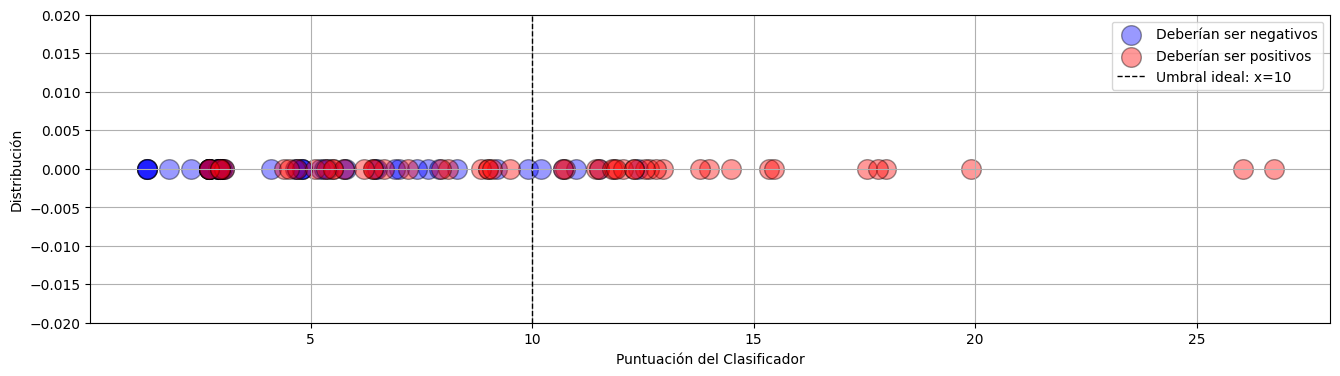

In [4]:
# Separar las puntuaciones en dos grupos: los primeros 50 deberían ser no infectados (0), los últimos 50 infectados (1)
scores_negativos = scores[:50]  # Puntuaciones de los pacientes que deberían ser negativos
scores_positivos = scores[50:]  # Puntuaciones de los pacientes que deberían ser positivos


# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(16, 4))

# Graficar los resultados: rojos para los primeros 50, azules para los últimos 50
ax.scatter(scores_negativos, np.zeros_like(scores_negativos), color='blue', s=200, alpha=0.4, edgecolors='k', label='Deberían ser negativos')
ax.scatter(scores_positivos, np.zeros_like(scores_positivos), color='red', s=200, alpha=0.4, edgecolors='k', label='Deberían ser positivos')

# Ajustes adicionales al gráfico
ax.set_xlabel('Puntuación del Clasificador')
ax.set_ylabel('Distribución')
ax.set_ylim(-0.02, 0.02)
ax.axvline(10, color='k', linestyle='--', linewidth=1, label='Umbral ideal: x=10')
ax.legend()
ax.grid()

# Mostrar el gráfico
plt.show()

In [5]:
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Infeccción')
    plt.xlabel('Predicción')



In [6]:
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
matrix = confusion_matrix(y_true, y_pred)

print(matrix)
print(f"Precision: {precision}") # identifica cuantos de los infectados detectados son realmente infectados
print(f"Recall: {recall}") # identifica cuantos de los infectados reales detecta el clasificador
print(f"F1-Score: {f1}") # media armónica entre precision y recall
print(f"Precisión (Accuracy): {accuracy}") # identifica cuantos de los infectados y no infectados detecta el clasificador

[[39 11]
 [17 33]]
Precision: 0.75
Recall: 0.66
F1-Score: 0.7021276595744681
Precisión (Accuracy): 0.72


In [ ]:
for i in range (100):
    infected, score = clasificador.execute('datasets',i, 7.9)
    y_pred[i] = 1 if infected else 0
    scores[i] = score
y_pred

In [ ]:
for i in range (100):
    infected, score = clasificador.execute('datasets',i, 8)
    y_pred[i] = 1 if infected else 0
    scores[i] = score
y_pred

In [ ]:
for i in range (100):
    infected, score = clasificador.execute('datasets',i, 9)
    y_pred[i] = 1 if infected else 0
    scores[i] = score
y_pred

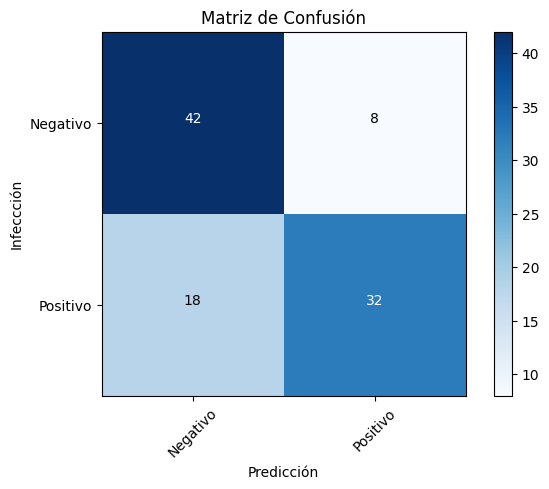

In [8]:
plt.figure()
matriz_confusion = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=[0, 1])
plot_confusion_matrix(matriz_confusion, classes=['Negativo', 'Positivo'], title='Matriz de Confusión')
plt.show()

In [9]:
fpr, tpr, thresholds = roc_curve(y_true, scores)
roc_auc = auc(fpr, tpr)
print(f"Área bajo la curva ROC: {roc_auc}")

Área bajo la curva ROC: 0.8131999999999999


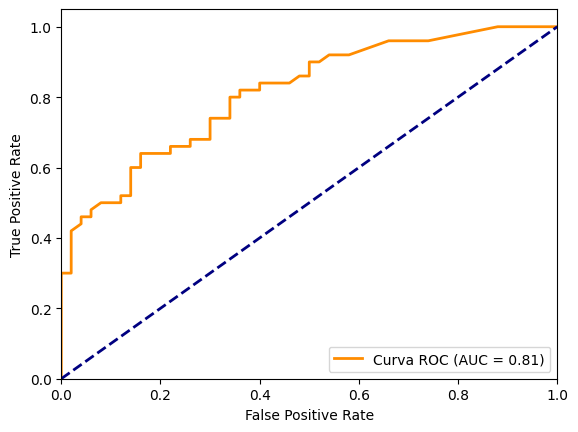

In [10]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.show()

In [11]:
# fpr, tpr, thresholds son obtenidos de la función roc_curve
optimal_idx = np.argmin(np.sqrt(np.square(fpr) + np.square(1-tpr)))
optimal_threshold = thresholds[optimal_idx]
print(f"Umbral óptimo: {optimal_threshold}")


Umbral óptimo: 7.95


In [12]:
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]
print(f"Umbral óptimo: {optimal_threshold}")

Umbral óptimo: 7.95
